In [32]:
%matplotlib inline
from argparse import ArgumentParser
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
from sound_from_video import *
#

In [9]:
  args = {
      "input_video": "../../VID_20200120_165221.mp4",
      "output" : "../../out" 
  }

vr = cv.VideoCapture(args['input_video'])
sr = round(vr.get(cv.CAP_PROP_FPS)) if  480 is None else 480
x, _ = sound_from_video(vr, 1, 2, downsample_factor=0.1, sampling_rate=sr)


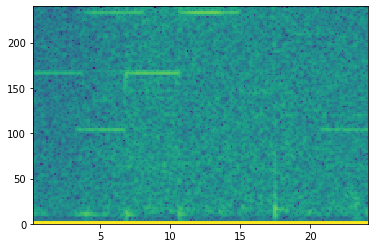

In [49]:

plt.figure()
plt.specgram(x, Fs=sr, noverlap= 200)
plt.show()

#wavfile.write(args.output, sr, x)

In [37]:
wavfile.write(args['output'], sr, x)
